 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns_csv = Path("Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
whale_returns.sort_index(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
whale_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
algo_returns.sort_index(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [10]:
algo_returns.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_csv = Path("Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp_tsx_history.sort_index(inplace=True)
sp_tsx_history.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [12]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$','', regex=True)
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(',','', regex=True)
sp_tsx_history

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [14]:
sp_tsx_history['Close'] = sp_tsx_history['Close'].astype('float64')
sp_tsx_history.dtypes

Close    float64
dtype: object

In [15]:
# Calculate Daily Returns
sp_tsx_history = sp_tsx_history.pct_change()
sp_tsx_history

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [16]:
# Drop nulls
sp_tsx_history.dropna(inplace=True)
sp_tsx_history

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [17]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["S&P TSX"]
sp_tsx_history.columns = columns
sp_tsx_history

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [18]:
sp_tsx_history.dtypes

S&P TSX    float64
dtype: object

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns = pd.concat([whale_returns, algo_returns, sp_tsx_history], axis = "columns", join = "inner")
portfolio_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

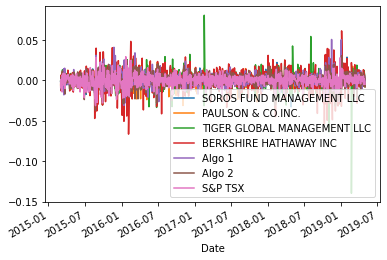

In [20]:
# Plot daily returns of all portfolios
portfolio_returns.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

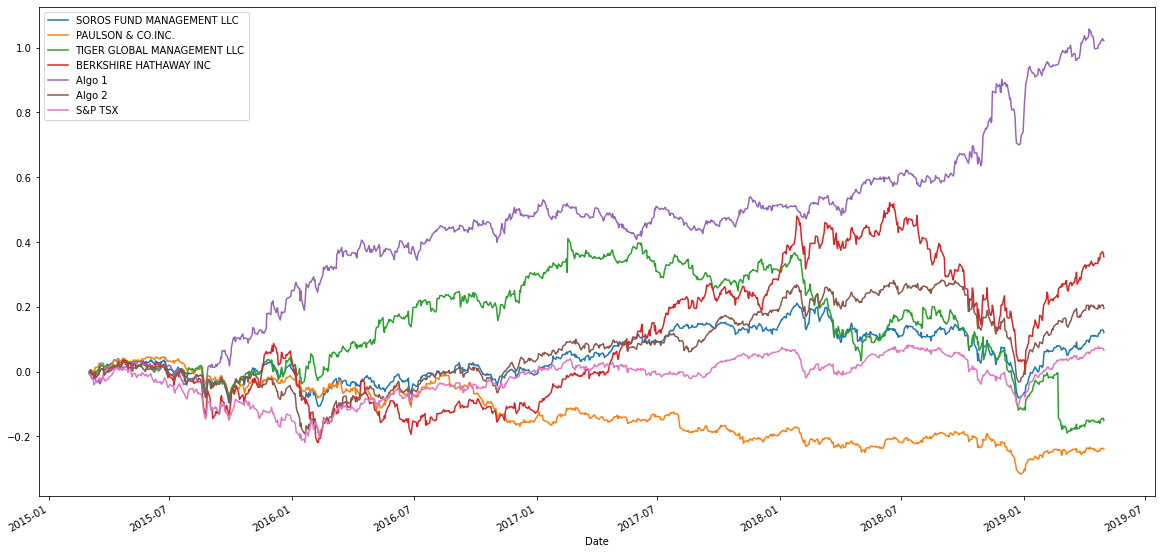

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

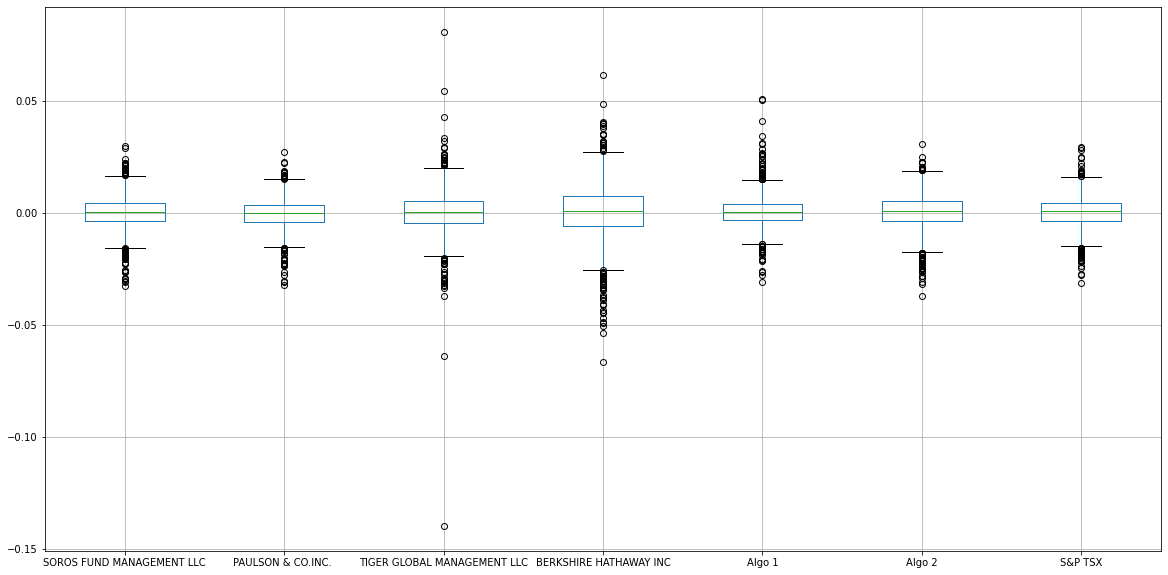

In [22]:
# Box plot to visually show risk
portfolio_returns.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
portfolio_returns.std()

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_history.std()
# Determine which portfolios are riskier than the S&P TSX 60
portfolio_returns_std = portfolio_returns.std()
print(portfolio_returns_std>portfolio_returns_std["S&P TSX"])
# SOROS FUND MANAGEMENT LLC, TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC, Algo 1, Algo 2 are riskier than S&P TSX

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool


### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annualized_standard_deviation = portfolio_returns_std*np.sqrt(252)
annualized_standard_deviation

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

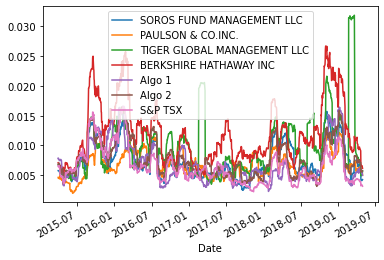

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_returns.rolling(window=21).std()
# Plot the rolling standard deviation
portfolio_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [27]:
# Calculate the correlation
portfolio_correlation = portfolio_returns.corr()
# Display de correlation matrix
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

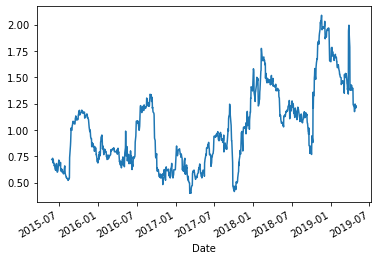

In [28]:
# Calculate covariance of a single portfolio
covariance = portfolio_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(portfolio_returns['S&P TSX'])
# Calculate variance of S&P TSX
variance = portfolio_returns['S&P TSX'].rolling(window=60).var()
# Computing beta
brk_beta = covariance / variance
# Plot beta trend
brk_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

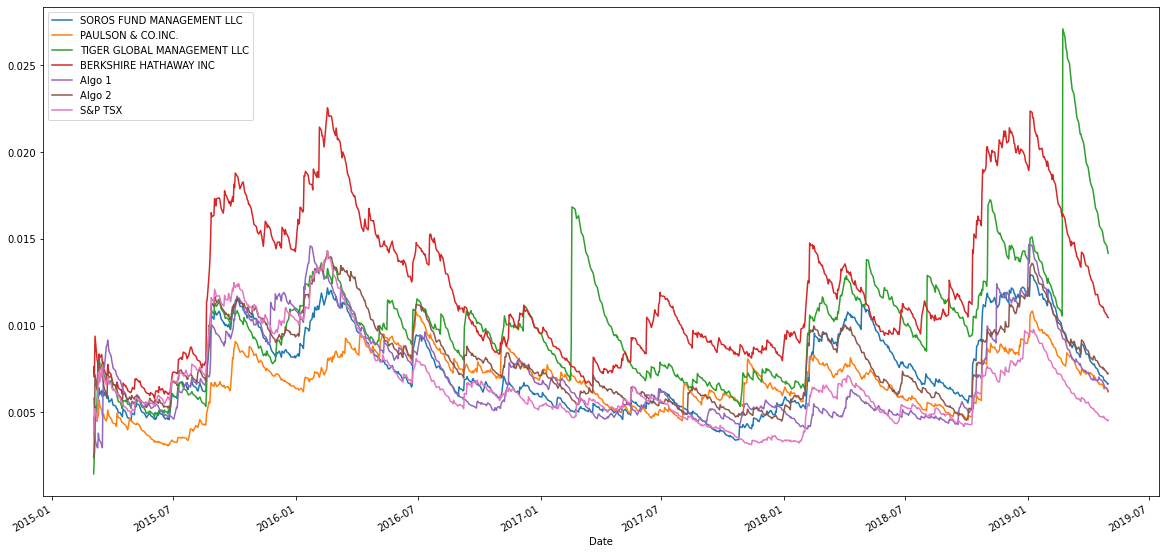

In [29]:
# Use `ewm` to calculate the rolling window
portfolio_returns.ewm(halflife=21).std().plot(figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios
e_r = portfolio_returns.mean()*252
vol = annualized_standard_deviation
sr = e_r/vol
print(sr)

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64


<AxesSubplot:>

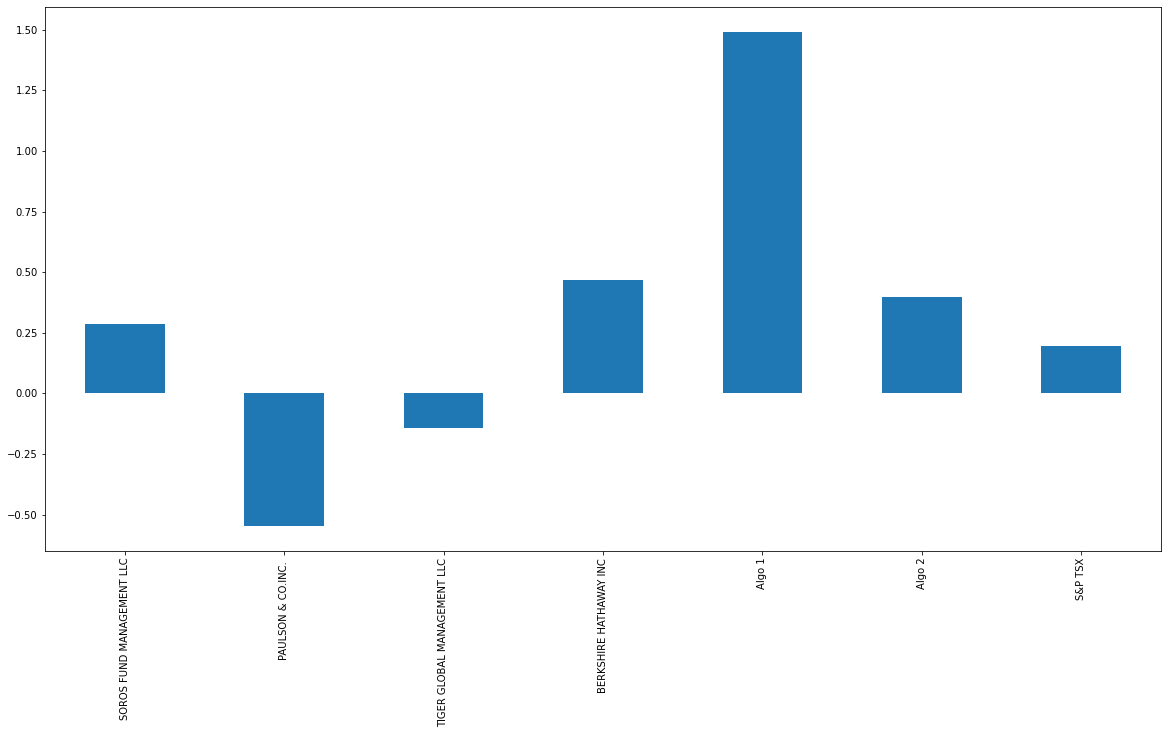

In [31]:
# Visualize the sharpe ratios as a bar plot
sr.plot.bar(figsize=(20, 10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Yes, the algorithmic strategies outperform the S&P TSX and the whale portfolio

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [32]:
# Reading data from 1st stock
shop_historical_csv = Path("Resources/shop_historical.csv")
shop_historical = pd.read_csv(shop_historical_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
shop_historical.sort_index(inplace=True)
shop_historical.drop(columns=["Symbol"], inplace=True)
shop_historical.rename(columns = {"Close":"SHOP"}, inplace=True)
shop_historical.head()

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [33]:
# Reading data from 2nd stock
otex_historical_csv = Path("Resources/otex_historical.csv")
otex_historical = pd.read_csv(otex_historical_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
otex_historical.sort_index(inplace=True)
otex_historical.drop(columns=["Symbol"], inplace=True)
otex_historical.rename(columns = {"Close":"OTEX"}, inplace=True)
otex_historical.head()

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [34]:
# Reading data from 3rd stock
l_historical_csv = Path("Resources/l_historical.csv")
l_historical = pd.read_csv(l_historical_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
l_historical.sort_index(inplace=True)
l_historical.drop(columns=["Symbol"], inplace=True)
l_historical.rename(columns = {"Close":"L"}, inplace=True)
l_historical.head()

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [35]:
tsla_csv = Path("Resources/tsla.csv")
tsla_historical = pd.read_csv(tsla_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
tsla_historical.sort_index(inplace=True)
tsla_historical.rename(columns = {"Close":"TSLA"}, inplace=True)
tsla_historical.head()

,TSLA
Date,
2015-01-05,42.018002
2015-01-06,42.256001
2015-01-07,42.189999
2015-01-08,42.124001
2015-01-09,41.332001


In [36]:
arkk_csv = Path("Resources/arkk.csv")
arkk_historical = pd.read_csv(arkk_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
arkk_historical.sort_index(inplace=True)
arkk_historical.rename(columns = {"Close":"ARKK"}, inplace=True)
arkk_historical.head()

,ARKK
Date,
2015-01-05,19.684000
2015-01-06,19.610001
2015-01-07,19.700001
2015-01-08,20.139999
2015-01-09,19.969999


In [37]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([shop_historical, otex_historical, l_historical, tsla_historical, arkk_historical], axis = "columns", join = "inner")
my_portfolio.head()

,SHOP,OTEX,L,TSLA,ARKK
Date,,,,,
2018-01-02,132.06,43.58,57.99,64.106003,38.580002
2018-01-03,135.15,43.07,57.41,63.450001,38.740002
2018-01-04,137.46,42.91,57.42,62.924000,38.869999
2018-01-05,137.26,42.57,57.42,63.316002,39.500000
2018-01-08,139.51,42.16,56.86,67.281998,39.230000


In [38]:
# Reset Date index


In [39]:
# Reorganize portfolio data by having a column per symbol


In [40]:
# Calculate daily returns
my_portfolio_returns = my_portfolio.pct_change()
# Drop NAs
my_portfolio_returns.dropna(inplace=True)
# Display sample data
my_portfolio_returns.head()

,SHOP,OTEX,L,TSLA,ARKK
Date,,,,,
2018-01-03,0.023398,-0.011703,-0.010002,-0.010233,0.004147
2018-01-04,0.017092,-0.003715,0.000174,-0.008290,0.003356
2018-01-05,-0.001455,-0.007924,0.000000,0.006230,0.016208
2018-01-08,0.016392,-0.009631,-0.009753,0.062638,-0.006835
2018-01-09,-0.011254,-0.000712,0.008969,-0.008085,0.002039


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]

# Calculate portfolio return
my_returns = my_portfolio_returns*weights
# Display sample data
my_returns.head()

,SHOP,OTEX,L,TSLA,ARKK
Date,,,,,
2018-01-03,0.004680,-0.002341,-0.002000,-0.002047,0.000829
2018-01-04,0.003418,-0.000743,0.000035,-0.001658,0.000671
2018-01-05,-0.000291,-0.001585,0.000000,0.001246,0.003242
2018-01-08,0.003278,-0.001926,-0.001951,0.012528,-0.001367
2018-01-09,-0.002251,-0.000142,0.001794,-0.001617,0.000408


In [42]:
port_ret = my_returns.sum(axis=1)
port_ret.head()

Date
2018-01-03   -0.000878
2018-01-04    0.001723
2018-01-05    0.002612
2018-01-08    0.010562
2018-01-09   -0.001808
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio = pd.concat([portfolio_returns, port_ret], axis = "columns", join = "inner")
all_portfolio.rename(columns = {0:"MY PORTFOLIO"}, inplace=True)
all_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,MY PORTFOLIO
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,-0.000878
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.001723
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,0.002612
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.010562
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.001808


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX                        0
MY PORTFOLIO                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
all_portfolio_std = all_portfolio.std()
all_annualized_standard_deviation = all_portfolio_std*np.sqrt(252)
all_annualized_standard_deviation

SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
MY PORTFOLIO                   0.242038
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

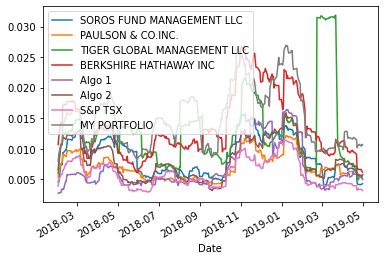

In [46]:
# Calculate rolling standard deviation
all_portfolio.rolling(window=21).std()
# Plot rolling standard deviation
all_portfolio.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [47]:
# Calculate and plot the correlation
my_portfolio_correlation = all_portfolio.corr()
my_portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,MY PORTFOLIO
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.637235
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.481982
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.347758
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.731230
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.236012
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.656907
S&P TSX,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.588235
MY PORTFOLIO,0.637235,0.481982,0.347758,0.731230,0.236012,0.656907,0.588235,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:xlabel='Date'>

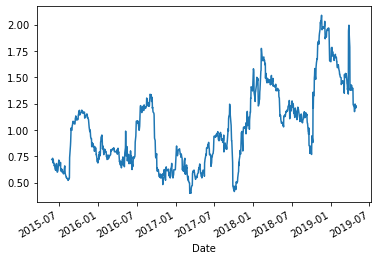

In [48]:
# Calculate and plot Beta
my_covariance = all_portfolio['MY PORTFOLIO'].rolling(window=60).cov(portfolio_returns['S&P TSX'])
# Calculate variance of S&P TSX
my_variance = all_portfolio['S&P TSX'].rolling(window=60).var()
# Computing beta
my_beta = my_covariance / my_variance
# Plot beta trend
brk_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualzied Sharpe Ratios
my_e_r = all_portfolio.mean()*252
my_vol = all_annualized_standard_deviation
my_sr = my_e_r/my_vol
print(my_sr)

SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
MY PORTFOLIO                   0.980619
dtype: float64


<AxesSubplot:>

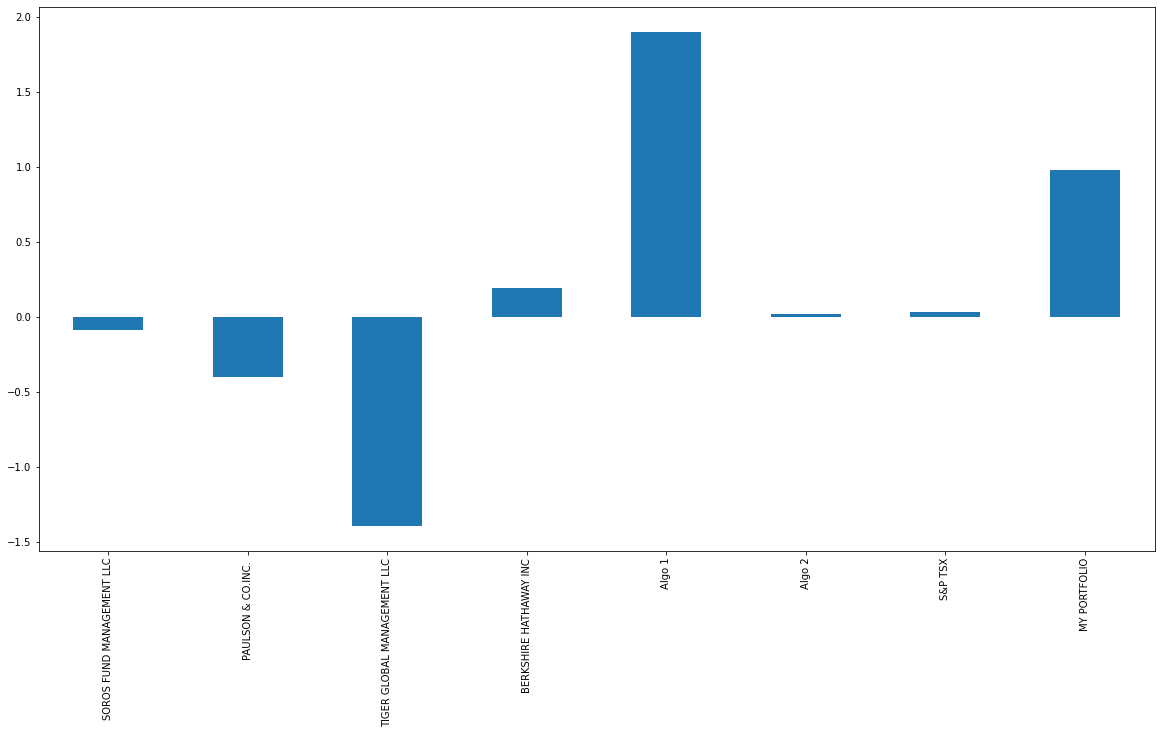

In [50]:
# Visualize the sharpe ratios as a bar plot
my_sr.plot.bar(figsize=(20, 10))

### How does your portfolio do?

My portfolio outperforms the S&P TSX but not the Algo1